# Andry Ramorasata

## Research questions/interests

If there is a significant correlation between a demographic factor and a crime? Disorder and a crime?
What are the statistics of somebody to commit a specific crime based off certain demographic characterisics?

Revamped questions, October 31, 2021.  
Order of questions:  
Relation between one of the top ten disorders and number of sentences?
Disorder and most common type of crime?  
If I am given a certain disorder, could I predict the probability of the type of crimes based on certain factors?
If I am given a crime, can I figure out the probability of certain demographic characteristics?
Can disorder play a role with demographic characteristics?

Final question(s):   
1. Do individual demographic characteristics play a role in crime frequency?
2. Does crime frequency increase when two or more demographic characteristics are included?
3. Which crime is most associated with the most frequent demographic characteristics observed?

# Milestone 3 & 5

### Task 1:

#### Exploratory Data Analysis

In [9]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read data
Data1 = pd.read_csv("../data/processed/rec1data.csv")

# Data content
Data1.info() 
Data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1003 non-null   int64
 1   id          1003 non-null   int64
 2   rid         1003 non-null   int64
 3   sex         1003 non-null   int64
 4   birth       1003 non-null   int64
 5   race        1003 non-null   int64
 6   educ        1003 non-null   int64
 7   marital     1003 non-null   int64
 8   children    1003 non-null   int64
 9   occupat     1003 non-null   int64
 10  arrests     1003 non-null   int64
 11  jail        1003 non-null   int64
 12  crime01     1003 non-null   int64
 13  crime02     1003 non-null   int64
 14  crime03     1003 non-null   int64
 15  crime04     1003 non-null   int64
 16  crime05     1003 non-null   int64
 17  crime06     1003 non-null   int64
 18  crime07     1003 non-null   int64
 19  crime08     1003 non-null   int64
 20  crime09     1003 non-null   in

,Unnamed: 0,id,rid,sex,birth,race,educ,marital,children,occupat,...,crime05,crime06,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,0
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Visualize the data better 
pd.set_option('display.max_rows', rec1data.shape[0]+1) # Command blocks adapted by Andryw Marques (https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf)
pd.set_option('display.max_columns', None)
# Insert here 'Data1' for full table.

NameError: name 'rec1data' is not defined

In [4]:
# Set back to default
pd.reset_option('^display.', silent=True)
Data1

,Unnamed: 0,id,rid,sex,birth,race,educ,marital,children,occupat,...,crime05,crime06,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,0
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,999,991,1,21,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
999,1000,1000,991,1,48,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,1001,1001,991,1,46,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,1002,1002,991,1,42,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Even though all the following data points/values are integers, most are technically categorical,
# so lets change the following:
Data1 = Data1.astype({'id': 'object', 
                      'sex': 'category',
                      'race': 'category',
                     'marital': 'category',
                      'occupat': 'category',
                     'crime01': 'category',
                     'crime02':'category',
                     'crime03': 'category',
                     'crime04': 'category',
                     'crime05': 'category',
                     'crime06': 'category',
                     'crime07': 'category',
                     'crime08': 'category',
                     'crime09': 'category',
                     'crime10':'category',
                     'crime11': 'category',
                     'crime12':'category',
                     'crime13':'category',
                     'crime14':'category'})
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  617 non-null    int64   
 1   id          617 non-null    object  
 2   rid         617 non-null    int64   
 3   sex         617 non-null    category
 4   birth       617 non-null    int64   
 5   race        617 non-null    category
 6   educ        617 non-null    int64   
 7   marital     617 non-null    category
 8   children    617 non-null    int64   
 9   occupat     617 non-null    category
 10  arrests     617 non-null    int64   
 11  jail        617 non-null    int64   
 12  crime01     617 non-null    category
 13  crime02     617 non-null    category
 14  crime03     617 non-null    category
 15  crime04     617 non-null    category
 16  crime05     617 non-null    category
 17  crime06     617 non-null    category
 18  crime07     617 non-null    category
 19  crime08 

In [6]:
# Now, let's have a general idea of how many sentences people received by creating another column.
Data1['sentences'] = (Data1.iloc[:,12:25] != 0).sum(axis=1)
Data1['sentences'].describe()

# Seeing that we have a minimum of 0, seems like some people weren't convicted. 

count    1003.000000
mean        0.816550
std         1.115239
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        13.000000
Name: sentences, dtype: float64

In [7]:
# What I want to see now is how many people weren't sentenced.
Sentenced = [0]
ZS = Data1[Data1["crime01"].isin(Sentenced)]
ZS
# That's quite a few people without any sentences. Perhaps there is an error in the data and some may have crimes..?
# Let's see if these people were arrested or jailed.
A = ZS.arrests.sum()
J = ZS.jail.sum()
print(A)
print(J)

0
0


In [8]:
# The codebook doesn't seem to explain the missing information, so perhaps we will just remove all the individuals
# with a total sentence of 0.
Data1 = Data1[Data1.sentences != 0]
Data1.info()
Data1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  617 non-null    int64   
 1   id          617 non-null    object  
 2   rid         617 non-null    int64   
 3   sex         617 non-null    category
 4   birth       617 non-null    int64   
 5   race        617 non-null    category
 6   educ        617 non-null    int64   
 7   marital     617 non-null    category
 8   children    617 non-null    int64   
 9   occupat     617 non-null    category
 10  arrests     617 non-null    int64   
 11  jail        617 non-null    int64   
 12  crime01     617 non-null    category
 13  crime02     617 non-null    category
 14  crime03     617 non-null    category
 15  crime04     617 non-null    category
 16  crime05     617 non-null    category
 17  crime06     617 non-null    category
 18  crime07     617 non-null    category
 19  crime08 

,Unnamed: 0,id,rid,sex,birth,race,educ,marital,children,occupat,...,crime06,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14,sentences
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,1
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,1
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,1
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# Now we are down to 616 entries out of 1003 we originally had.
# Let's clean up the data just a little bit more. 
df1 = Data1.drop(labels = ["Unnamed: 0", "arrests", "jail","rid"], axis=1)
df1.sentences.describe()

count    617.000000
mean       1.327391
std        1.159284
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       13.000000
Name: sentences, dtype: float64

array([[<AxesSubplot:title={'center':'sentences'}>]], dtype=object)

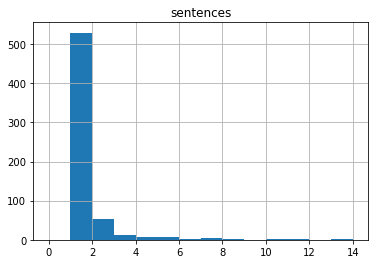

In [10]:
# Solid, lets see this visually
df1.hist(column = "sentences", bins = range(15))
# Data here is positively skewed. 

<AxesSubplot:>

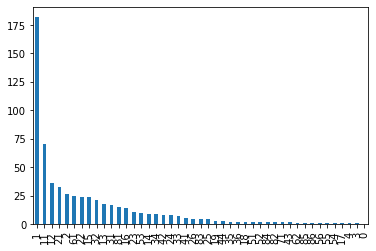

In [11]:
# Let's answer the question, for the first sentence, what is the most frequent crime?
x = 10
df1['crime01'].value_counts()[:x].index.tolist()
df1['crime01'].value_counts().plot(kind='bar')
# Okay, so it's public intoxication, larcency(11-12), assault, possession of drugs, Youthful Offender, 
# possession of dangerous weapons, trespass, DUI, possession of stolen property.

In [12]:
# Psych Data analysis - import and visualization
pdata = pd.read_csv("../data/processed/psychdata.csv")
pdata.info()
pdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4548 non-null   int64 
 1   id            4548 non-null   int64 
 2   contact       4548 non-null   int64 
 3   date_contact  4548 non-null   int64 
 4   facility      4548 non-null   int64 
 5   address       4548 non-null   object
 6   diagnosis     4548 non-null   object
 7   service       4548 non-null   int64 
 8   date_term     4548 non-null   int64 
 9   reason_term   4548 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 355.4+ KB


,Unnamed: 0,id,contact,date_contact,facility,address,diagnosis,service,date_term,reason_term
0,1,1,1,600804,1,100,103,0,600808,0
1,2,1,2,600809,2,100,715,1,601130,9
2,3,1,3,640320,1,100,715,0,640401,0
3,4,1,4,640910,2,100,715,0,641027,9
4,5,1,5,641109,1,100,103,0,641113,0


In [13]:
# Let's see the most common diagnosis
n = 10
pdata['diagnosis'].value_counts()[:n].index.tolist()

['755', '238', '758', '103', '715', '444', '617', '901', '436', '265']

<AxesSubplot:>

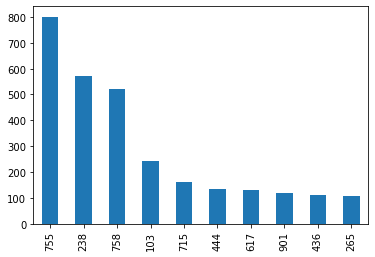

In [14]:
# Visualize this data
DIA = ['755', '238', '758', '103', '715', '444', '617', '901', '436', '265']
DIAS = pdata[pdata["diagnosis"].isin(DIA)]
DIAS['diagnosis'].value_counts().plot(kind='bar')

In [15]:
# Let's do some clean up of the psychiatric data. I only want data with the diagnosis.
psych_data = pdata.drop(labels=["Unnamed: 0", "contact", "date_contact", "facility", "address", "service", "date_term", "reason_term"], axis=1)
psych_data

,id,diagnosis
0,1,103
1,1,715
2,1,715
3,1,715
4,1,103
...,...,...
4543,1000,802
4544,1001,738
4545,1002,802
4546,1003,437


In [16]:
# Let's merge the two dataframes now.
rpdata = pd.merge(df1, psych_data, how='inner', on='id')
rpdata
# Theres seems to be duplicates. Must be what the author meant by possible matches for 
# psychiatric treatment and demographic characteristics.

,id,sex,birth,race,educ,marital,children,occupat,crime01,crime02,...,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14,sentences,diagnosis
0,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,103
1,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
2,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
3,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,715
4,1,1,18,1,10,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,382,1,52,1,13,1,0,0,61,0,...,0,0,0,0,0,0,0,0,1,802
3244,383,1,49,1,7,1,0,0,11,0,...,0,0,0,0,0,0,0,0,1,309
3245,384,1,48,2,11,1,0,20,12,0,...,0,0,0,0,0,0,0,0,1,617
3246,385,1,27,2,9,2,2,0,32,1,...,0,0,0,0,0,0,0,0,2,753


### Task 2-3:

#### Analysis Pipeline:

##### 1. Load Data

In [13]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
# Loading Data
Data1 = pd.read_csv("../data/processed/rec1data.csv")
pdata = pd.read_csv("../data/processed/psychdata.csv")

##### 2. Clean Data

In [ ]:
# Cleaning up Data1
DataFrame1 = Data1.drop("Unnamed: 0", axis=1)
df1 = DataFrame1.drop(columns=['arrests', 'jail','rid'])


# Cleaning up PsychData
psych_data = pdata.drop(labels=["Unnamed: 0", "contact", "date_contact", "facility", 
                                "address", "service", "date_term", "reason_term"], axis=1)
psych_data

##### 3. Process Data

In [ ]:
# Creating variables
df1['sentences'] = (df1.iloc[:,8:21] != 0).sum(axis=1)

##### 4. Wrangle Data

In [ ]:
# Restructuring.
# Merging diagnosis and crimes
rpdata = pd.merge(df1, psych_data, how='inner', on='id')
rpdata

In [1]:
# Method Chaining
import pandas as pd
import numpy as np
import project_functions2 as p
rpdata = p.load_and_process("../data/processed/rec1data.csv")

### Task 4

### Data Analysis

In [5]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

print("Numbers of rows and columns, respectively:", rpdata.shape)
print("Columns in the dataset:", rpdata.columns)

Numbers of rows and columns, respectively: (617, 23)
Columns in the dataset: Index(['id', 'sex', 'birth', 'race', 'educ', 'marital', 'children', 'occupat',
       'crime01', 'crime02', 'crime03', 'crime04', 'crime05', 'crime06',
       'crime07', 'crime08', 'crime09', 'crime10', 'crime11', 'crime12',
       'crime13', 'crime14', 'sentences'],
      dtype='object')


#### Demographic Characteristics
Questions:
 - Do individual demographic characteristics play a role in crime frequency?

In [3]:
#Removing duplicates
rpdata = (rpdata.drop_duplicates(subset=['id','race'], keep='first')
          .reset_index(drop=True)
         )
crime = rpdata.drop(columns=['id','crime02','crime03','crime04','crime05','crime06','crime07',
                              'crime08','crime09','crime10','crime11', 'crime12','crime13','crime14'])

##### **Age**
For age, I hypothesize that the analysis will present a right skewed histogram for the frequency of a crime to be committed at a particular age.

In [7]:
# Let's convert birth to age. As of right now the data presents the year they were born between the 1900s and the
# year this data was collected was 1972.
crime.rename(columns={'birth':'age'}, inplace=True)
crime.astype({'age':int})
crime["age"] = 1972 - (crime["age"] + 1900)
crime

,sex,age,race,educ,marital,children,occupat,crime01,sentences
0,1,54,1,10,4,1,0,1,1
1,1,56,1,10,2,3,20,1,1
2,1,51,1,7,1,0,10,1,1
3,1,40,1,7,1,0,10,1,1
4,1,19,2,11,1,0,10,61,1
...,...,...,...,...,...,...,...,...,...
612,1,51,1,7,5,0,0,1,1
613,1,26,1,16,4,0,0,31,1
614,1,22,1,9,1,0,0,11,1
615,1,17,2,9,1,0,0,33,1


/Users/natanaram/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(-5, -0.009, 'Figure 1. Density plot of the count of each individual age within the dataset. This is a right skewed historgram, \n showing that individuals between the ages 17-23 are more likely to commit a crime over the older ages.')

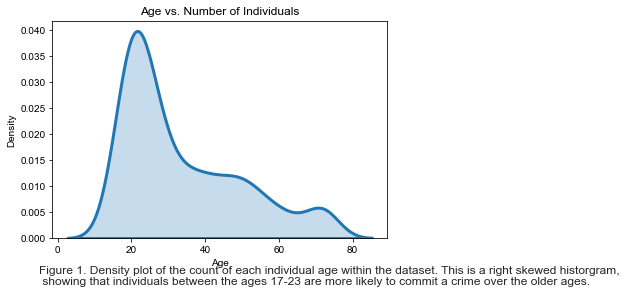

In [8]:
ax = sns.distplot(crime['age'], hist=False, kde=True, kde_kws = {'shade': True, 'linewidth': 3})
sns.set(rc={"figure.figsize": (8, 5)})
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title('Age vs. Number of Individuals')
txt = "Figure 1. Density plot of the count of each individual age within the dataset. This is a right skewed historgram, \n showing that individuals between the ages 17-23 are more likely to commit a crime over the older ages."
ax.text(-5, -0.009, txt, ha='left')

##### **Sex**
Sex/gender are one of those factors where it's depicted to be male dominant in criminal events. We will see if that hypothesis runs true in this data set.

Text(-0.9, -0.35, 'Figure 2. Percentage of individuals for sex/gender (1=male, 2=female). \n Gender may be a determing factor as males represent 90+% of the population in this data, \n but statistical analysis must be further made. ')

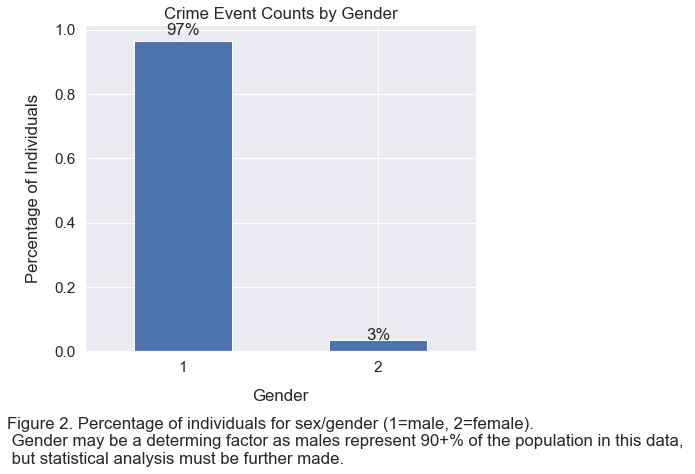

In [9]:
sns.set(font_scale=1.4)
ax = crime['sex'].value_counts(normalize=True).plot(kind='bar', figsize=(7, 6), rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Percentage of Individuals", labelpad=14)
plt.title("Crime Event Counts by Gender", y=1)
txt = "Figure 2. Percentage of individuals for sex/gender (1=male, 2=female). \n Gender may be a determing factor as males represent 90+% of the population in this data, \n but statistical analysis must be further made. "
ax.text(-0.9, -0.35, txt, ha='left')

##### **Race**
Race is a demographic characteristic that I cannot speculate until further research. For now, we will just observe what the data show.

Text(-0.9, -0.2, "Figure 2. Histogram of crime events frequency in relation to race (1=white, 2=black). \n Race appears to be fairly similar in percentage, with only a percentage difference of 9.4% (white=0.52, \n black=0.48). This isn't significant enough to be considered a crucial factor in this dataset, but \n further analysis can be made")

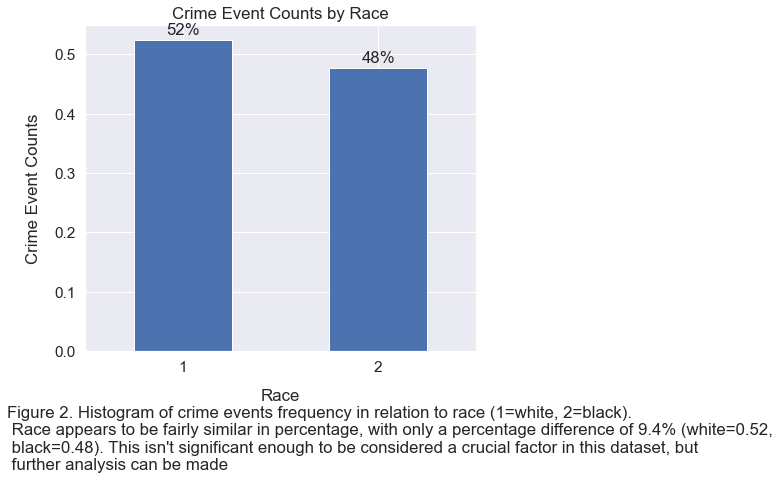

In [84]:
# Creating plot
sns.set(font_scale=1.4)
ax = crime['race'].value_counts(normalize=True).plot(kind='bar', figsize=(7, 6), rot=0)
# Adding percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center') #Adapted from "https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib"

# Setting labels/caption
plt.xlabel("Race", labelpad=14)
plt.ylabel("Crime Event Counts", labelpad=14)
plt.title("Crime Event Counts by Race", y=1)
txt = "Figure 2. Histogram of crime events frequency in relation to race (1=white, 2=black). \n Race appears to be fairly similar in percentage, with only a percentage difference of 9.4% (white=0.52, \n black=0.48). This isn't significant enough to be considered a crucial factor in this dataset, but \n further analysis can be made"
ax.text(-0.9, -0.2, txt, ha='left')

##### **Occupation**
Occupation is a demographic characteristic in which we should see clear differences. Those with no jobs can be easily considered to have motive for criminal actions, or those of low income can be associated with the types of occupation.

Text(-0.9, -0.215, "Figure 4. Histogram of crime events frequency in relation to type of occupation (0=No information, \n 10=unskilled, 20=skilled, 30=white collar, 40=military, 50=professional, 60=student). Unfortunately, 'no \n information' seems to be the most frequent type of job, so I can't determine much from it. However, \n seeing unskilled as the second highest can only lead me to assume that perhaps some of the 'no information' \n lies within this type of occupation as well.")

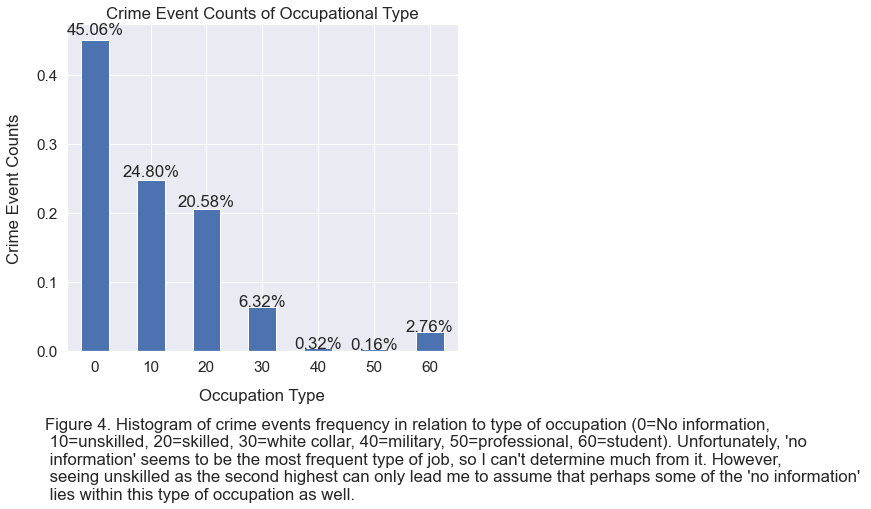

In [11]:
sns.set(font_scale=1.4)
ax = crime['occupat'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(7, 6), rot=0)

# Adding percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

# Setting axis labels and caption
plt.xlabel("Occupation Type", labelpad=14)
plt.ylabel("Crime Event Counts", labelpad=14)
plt.title("Crime Event Counts of Occupational Type", y=1)
txt = "Figure 4. Histogram of crime events frequency in relation to type of occupation (0=No information, \n 10=unskilled, 20=skilled, 30=white collar, 40=military, 50=professional, 60=student). Unfortunately, 'no \n information' seems to be the most frequent type of job, so I can't determine much from it. However, \n seeing unskilled as the second highest can only lead me to assume that perhaps some of the 'no information' \n lies within this type of occupation as well."
ax.text(-0.9, -0.215, txt, ha='left')

##### **Marital Status**
For an individual's marital status, I speculate that those who are single or divorced may be the most common people to commit a crime.

Text(-0.9, -0.25, "Figure 5. Histogram of crime events frequency in relation to marital status (0=no informaiton, \n 1=single, 2=married, 3=separated, 4=divorced, 5=widowed, 6=common law marriage). \n Being 'single' seems to be the most common marital status, so we can state, based off observations, \n that marital status plays a role in crime events (single = 54%).")

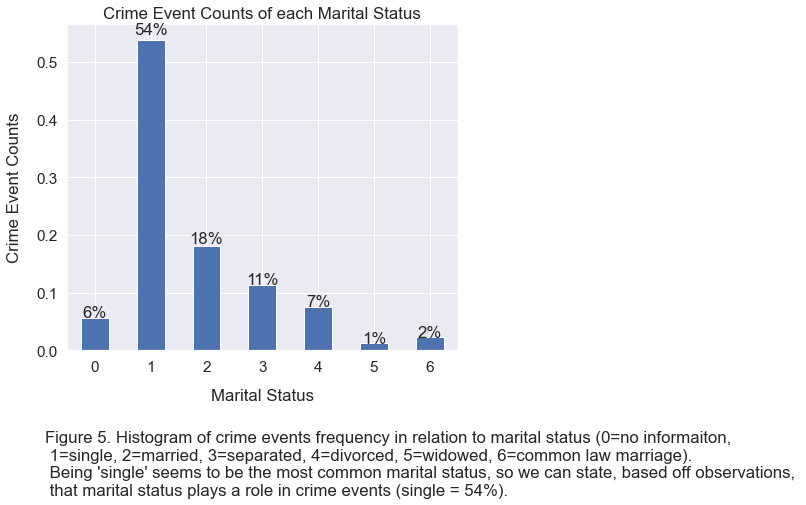

In [12]:
sns.set(font_scale=1.4)
ax = crime['marital'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(7, 6), rot=0)

# Adding percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

# Setting axis labels and caption
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Crime Event Counts", labelpad=14)
plt.title("Crime Event Counts of each Marital Status", y=1)
txt = "Figure 5. Histogram of crime events frequency in relation to marital status (0=no informaiton, \n 1=single, 2=married, 3=separated, 4=divorced, 5=widowed, 6=common law marriage). \n Being 'single' seems to be the most common marital status, so we can state, based off observations, \n that marital status plays a role in crime events (single = 54%)."
ax.text(-0.9, -0.25, txt, ha='left')

##### **Education**
Education is something I would see have similar relation to age and occupation. In this case, those with a low/incompleted amount of years for education will have a higher count of crime events.

Text(-0.9, -0.1, 'Figure 6. Histogram of crime events frequency in relation to years of education. Years 11 and 12 \n have the highest percentage of the group, 21% and 22%, respectively. There seems \n to be a general range between the years of education, representing a left skewed plot.')

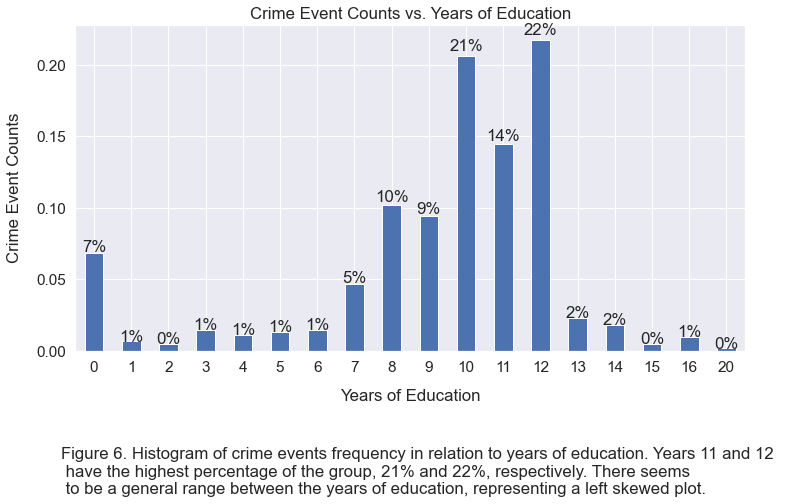

In [13]:
sns.set(font_scale=1.4)
ax = crime['educ'].value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(12, 6), rot=0)

# Adding percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

# Setting axis labels and caption
plt.xlabel("Years of Education", labelpad=14)
plt.ylabel("Crime Event Counts", labelpad=14)
plt.title("Crime Event Counts vs. Years of Education", y=1)
txt = "Figure 6. Histogram of crime events frequency in relation to years of education. Years 11 and 12 \n have the highest percentage of the group, 21% and 22%, respectively. There seems \n to be a general range between the years of education, representing a left skewed plot."
ax.text(-0.9, -0.1, txt, ha='left')

##### Demographic characteristics chart/plot analysis
This section was used to help answer question 1 and proved to be more of an EDA. Based on the data observed, here is what we can deduce:

- **Age**
    - As seen in figure 1, there is a right skewed density plot that shows the higher frequency of crime events occur within the earlier ages. 
    - The ages with the highest crime event count are 20 and 22, both at 39 counts out of 617.
    - From visual observations, we can determine that age does play a role in the number of crime events.
- **Sex**
    - My initial speculation was confirmed based on the histogram observed, the count of males were much higher than female in the dataset. 
    - Perhaps we can see the difference between the types of crimes between male and female in further analysis.
- **Race**
    - There can be no speculation made between the two races observed in the dataset.
    - White and black race were found to be fairly equal in frequency, white being 52% and black 48%.
- **Occupation**
    - A high percentage of the sample have no information of their occupation, so it is uncertain to determine the true impact of occupation on crime events.
    - However, from the data, the next most common group are unskilled individuals, so let's see their relation with other demographic characteristics.
- **Marital Status**
    - Based on just the visual observations provided in figure 5, we can hypothesize that marital status plays a role in number of crime events.
    - Being single seems to be the most common marital status, with the highest percentage of 54%.
- **Education**
    - Education is probably the most interesting plot to be observed out of all the data. I expected those with minimal years of education would show higher frequency of crime, yet those who almost finished or finished 12 yeas of education had the highest count.
    - Is there a relation between age and education, and also occupation and education? Perhaps there are some who obtained better occupations within the shorter amount of years.

#### Statistical Analysis of Mixed Groups
We will use chi-square test of independence to see whether or not the categories are related.   
Questions:
 - Does crime frequency increase when two or more demographic characteristics are included?
 - Hypothesis of interests:
     - Sex and Occupation set at $\alpha$ = 0.05.
         - H0: There is no relation between Sex and Occupation. 
         - Ha: There is a relation between Sex and Occupation.
     - Education and Occupation set at $\alpha$ = 0.05.
         - H0: There is no relation between Education and Occupation. 
         - Ha: There is a relation between Education and Occupation.
     - Sex, Education, and Occupation set at $\alpha$ = 0.05.
         - H0: There are no relations between the three categories provided. 
         - Ha: There are one or more relations found between the three categories provided.
         

Text(0, 2.9, 'Figure 7. Heat map of Chi-Square of Independence for race versus occupation. \n The chi-square value of these two categories is 23.88, 6 degrees of freedom, \n and a pValue < 0.05.')

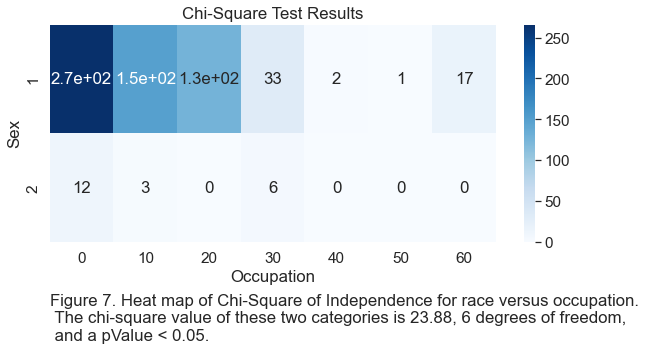

In [24]:
# Sex vs. Occupation
from scipy.stats import chi2_contingency

ro = pd.crosstab(index=crime['sex'], columns=crime['occupat'])
chiVal, pVal, df, exp = chi2_contingency(ro)
# Plotting a heatmap
fig = plt.figure(figsize=(10,4))
ax = sns.heatmap(ro, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.xlabel('Occupation')
plt.ylabel('Sex')
txt = "Figure 7. Heat map of Chi-Square of Independence for race versus occupation. \n The chi-square value of these two categories is 23.88, 6 degrees of freedom, \n and a pValue < 0.05."
ax.text(0, 2.9, txt, ha='left')

**Heat Map and Chi-square test analysis**
 - When looking at the heat map, you can see the majority of the group is male and no information. Afterwards you see male and unskilled are next highest majority.
 - According to the chi-square test of independence, we can reject the null hypothesis, and accept that there is a relation between sex/gender and occupation (Chi-square test; x2 = 23.88, df = 6, p < 0.05).
 - With the result of the analysis, we can deduce there is a significant correlation between sex and occupation.

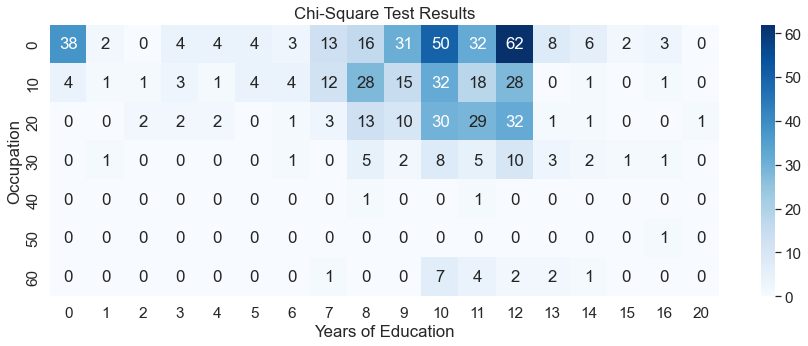

In [29]:
# Education vs. Occupation
ro1 = pd.crosstab(index=crime['occupat'], columns=crime['educ'])
chiVal1, pVal1, df1, exp1 = chi2_contingency(ro1)
chiVal1, pVal1, df1, exp1
# Plotting a heatmap
fig = plt.figure(figsize=(15,5))
sns.heatmap(ro1, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.xlabel('Years of Education')
plt.ylabel('Occupation')
plt.show()

In [30]:
chiVal1, pVal1, df1

(240.7789328896915, 3.0958671491797426e-13, 102)

**Heat Map and Chi-square test analysis**
 - When looking at the heat map, you can see the majority of the group are focused within unskilled/skilled and between 10-12 years of education.
 - There doesn't seem to be a general trend amongst the heat map itself as it is simply focused in a subset of people. 
 - When observing the values obtained from the chi-square test, we can reject the null hypothesis and accept the alternative. There is a significant relation between years of education and occupation, but there is no general trend line that can be observed (Chi-square test; x2 = 240.78, df = 102, p < 0.05).

In [50]:
# Sex vs. Education vs. Occupation
ct = pd.crosstab(crime['sex'], [crime['educ'], crime['occupat']])

chiVal2, pVal2, df2, exp2 = chi2_contingency(ct)
print(f"Chi-Square test; x2 = {chiVal2}, degrees of freedom = {df2}, p-Value = {pVal2} ")
ct

Chi-Square test; x2 = 87.09792533824955, degrees of freedom = 63, p-Value = 0.02389198902212039 


educ     0     1        2     3         ... 14       15    16          20
occupat   0 10  0 10 30 10 20  0 10 20  ... 20 30 60  0 30  0 10 30 50 20
sex                                     ...                              
1        36  4  2  1  1  1  2  4  3  2  ...  1  2  1  1  1  3  1  1  1  1
2         2  0  0  0  0  0  0  0  0  0  ...  0  0  0  1  0  0  0  0  0  0

[2 rows x 64 columns]

**Table and Chi-square test analysis**
 - Note: A heat-map would be too big to observe this dataset visually and a tree map would prove to be clustered, so we will just focus on the statistical analysis portion.
 - Unfortunately, not being able to visually observe the data inhibits the determination of the most frequent combination.
 - However,the values obtained from the chi-square test does tell us that there is a relation between the three categories, so we can reject the null hypothesis and accept the alternative. There is a significant relation between years of education, sex, and occupation (Chi-square test; x2 = 87.1, df = 63, p < 0.05).

#### Crime correlation with demographic characteristics
For this section, I want to focus on demographic characteristics that are not controllable, and just observe which crimes are associated with them.
Question:
- Which crime is most associated with the most frequent demographic characteristics observed?

In [87]:
df1 = crime[crime["age"].between(18,22)]
df2 = df1[df1["sex"] == 1]
Mix = df2[df2["race"] == 1]
Table = Mix["crime01"].value_counts().rename_axis('unique_values').reset_index(name='counts')
Table


,unique_values,counts
0,11,12
1,1,10
2,61,8
3,15,6
4,12,6
5,31,6
6,21,6
7,2,5
8,34,5
9,81,4


**Table analysis**
 - This section is to simply observe what crimes are seen amongst the conditional demographic characteristics. Seems like most of the criminal events are associated with petty larcency (Unique value = 11).
 - It makes sense that youthful offender is found most common amongst this group as they are the younger ages.
 - An analysis can be further made just to see the association strength of the crimes and their demographic characteristics.

### Summary & Conclusion

1. Do individual demographic characteristics play a role in criminal events?
    - From the analysis made, it would seem that certain demographic characteristics do play a role in the count of crimes. 
    - This dataset can only confirm a trend/association amongst this county jail's prisoners and cannot speak for the rest of the country. If the data was selected from a random list of county jails, perhaps we could then use that data to analyse a trend within the whole country.
    - There didn't seem to be any significant relation between race and crime events, as they were both near 50% of the population, only a percentage difference of ~9%.
    - These conclusions are only based on the plots observed for each individual demographic feature, but further statistical analysis should be made to better understanding the impact of each characteristic.

2. Does crime frequency increase when two or more demographic characteristics are included?
    - Based on the statistical analysis made, the demographic characteristics observed did show significant relations. Crossing the demographic characteristics would take too long, and some of the data may remain unmeaningful. 
    - I wanted to cross sections in which their characteristics can be changed and I added one in which they couldn't control.
    - Of course, there wasn't any normal distributions amongst the variables chosen, so nonparametric tests were required to understand any sort of relation between the variables. There are still tons of other tests that can be performed to find these relations, such as W-K test.

3. Which crime is most associated with the most frequent demographic characteristics observed?
    - This research question was only used to find any association between a criminal event and demographic characteristics.
    - From the table observed, it seems as though petty larcency and public intoxication are most common for those amongst the set demographic characteristics (top features of each demographic characteristics were chosem for this association).
    - From the explorative data analysis, it does fit what we found normally with most of the individuals being associated with public intoxication crimes.

Overall, the data was very interesting and we can deduce that certain demographic characteristics can be found in this county jail. Further studies can be made to understand the true relation and association of types of crime and their demographic characteristics. One other research of interest is studying if types of crimes can be associated with a specific diagnosis, which can also be done with a chi-square test of independence!
